<a href="https://colab.research.google.com/github/NaithaniAR/CapstoneProject-MLRegression/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing  libraries

 Importing important libraries for analysis and visualisation 

In [ ]:
import math

In [ ]:
#Libraries for analysis and visualisation 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as sm
%matplotlib inline
import calendar
from tqdm.notebook import trange, tqdm

In [ ]:
#Libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import r2_score

Reading Dataset into df. 


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter Projects /NYC Taxi Trip Time Prediction /NYC Data/NYC Taxi Data.csv',parse_dates=['pickup_datetime','dropoff_datetime'])

#To suppres scientific notation.
pd.options.display.float_format = '{:.5f}'.format 
pd.set_option('display.max_columns', None)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


In [ ]:
pd.option_context('display.precision', 10)

In [ ]:
pd.set_option('display.max_columns', None)

# **Data Exploration**
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [ ]:
# Checking top 5 records in dataframe
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435


In [ ]:
# Checking bottom 5 records in dataframe
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98220,40.74552,-73.99491,40.74017,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00095,40.74738,-73.97018,40.79655,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.95913,40.76880,-74.00443,40.70737,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98208,40.74906,-73.97463,40.75711,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.97954,40.78175,-73.97281,40.79058,N,198


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [ ]:
print("The shape of our dataset is :",(df.shape))

The shape of our dataset is : (1458644, 11)


In [ ]:
#Check count of unique id's in the dataset
print("There are %d unique id's in our dataset, which is equal to the number of records"%(df.id.nunique()))

There are 1458644 unique id's in our dataset, which is equal to the number of records


In [ ]:
#Check for NaN values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# Exploratory Data Analysis 

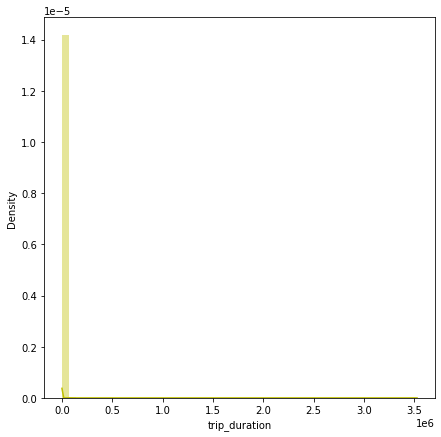

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'],color="y")

Our data is positively skewed, we will do log transformation 

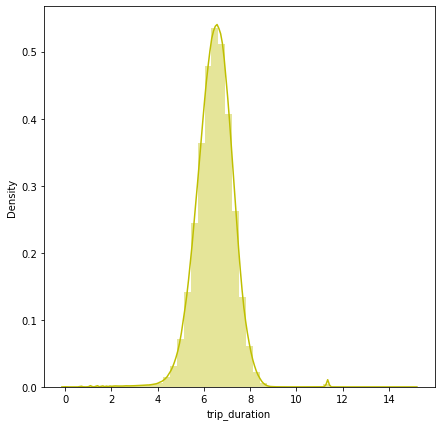

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['trip_duration']),color="y")

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

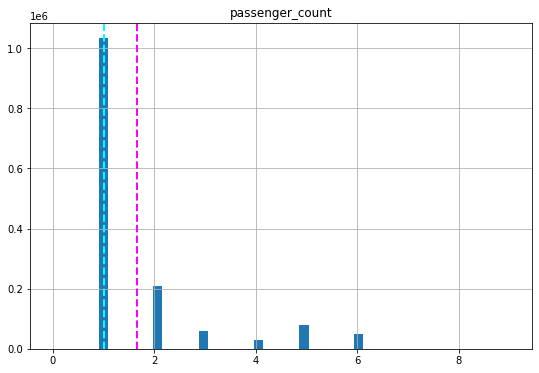

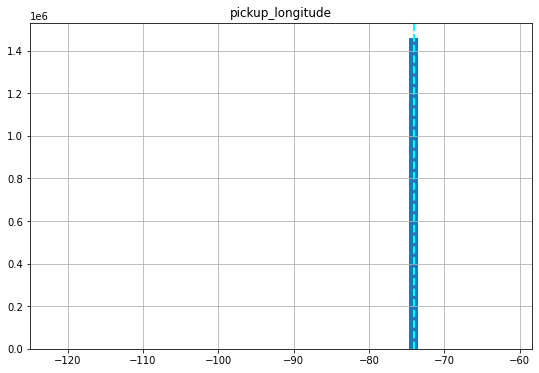

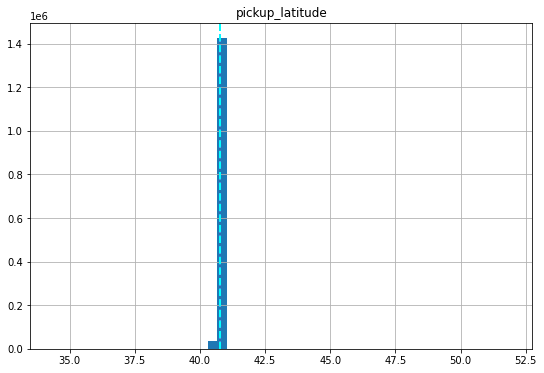

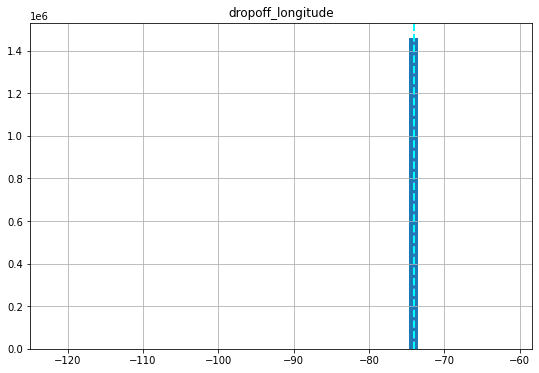

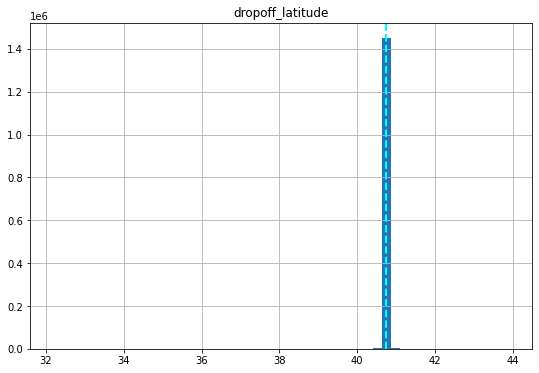

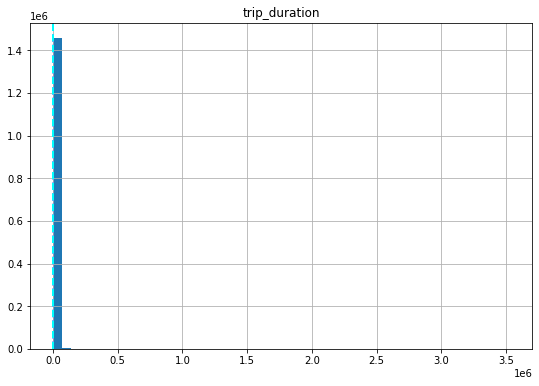

In [ ]:
# plotting a bar plot for all numerical feature  (except car_ID)
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
 #Calculating VIF 
 calc_vif(df[[i for i in df.describe().columns if i not in ['haversine_distance','id','vendor_id','dropoff_month']]])

,variables,VIF
0,passenger_count,2.60433
1,pickup_longitude,2813654.51867
2,pickup_latitude,1681290.39155
3,dropoff_longitude,2642114.85984
4,dropoff_latitude,1474475.64634
5,trip_duration,1.03399


# Feature Engineering

### **Distance:**

[**Haversine Distance :**](https://pypi.org/project/haversine/)
The majority of geospatial analysts agree that this is the appropriate distance to use for Earth distances and is argued to be more accurate over longer distances compared to Euclidean distance.

Performance is faster in computing compared to other great circle distance formulas such as [Vincenty Formula](https://pypi.org/project/vincenty/)


Manhattan Distance

**The Manhattan Distance :** *is a measure of the distance between two points that take into account the perpendicular layout of the map. It is called Manhattan distance because Manhattan is known for its grid or block layout where streets intersect at right angles*. [For more info](https://towardsdatascience.com/spatial-distance-and-machine-learning-2cab72fc6284)

In [ ]:
#we will use Haversine distance to calculate great circle distance between two points and manhattan distance to calculate block distance 
def haversine_distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

#manhattan distance to calculate block distance 
def manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

In [ ]:
#Adding column "haversine_distance" in our df 
df["haversine_distance"] = haversine_distance(df["pickup_latitude"], df["pickup_longitude"],df["dropoff_latitude"], df["dropoff_longitude"])

#Adding column "manhattan_distance" in our df 
df["manhattan_distance"] = manhattan_distance(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"])


### **Calculating Bearing**
The compass bearing is the direction towards which you are headed, as shown by a compass.



The four cardinal points on a compass, which split the circumference of the compass into four equal parts, are (going clockwise) North, East, South and West. Since there are 360º in the circumference, the cardinal points are separated by 360º/4 or 90º. [For more info](https://www.igismap.com/formula-to-find-bearing-or-heading-angle-between-two-points-latitude-longitude/)

In [ ]:
#Tupel of Pickup and dropoff points
df['Pickup'] = list(zip(df.pickup_latitude, df.pickup_longitude))
#Tupel of Pickup and dropoff points
df['Dropoff'] = list(zip(df.dropoff_latitude, df.dropoff_longitude))

In [ ]:
def calculate_initial_compass_bearing(pointA, pointB):
    """
    Calculates the bearing between two points.
    The formulae used is the following:
        θ = atan2(sin(Δlong).cos(lat2),
                  cos(lat1).sin(lat2) − sin(lat1).cos(lat2).cos(Δlong))
    :Parameters:
      - `pointA: The tuple representing the latitude/longitude for the
        first point. Latitude and longitude must be in decimal degrees
      - `pointB: The tuple representing the latitude/longitude for the
        second point. Latitude and longitude must be in decimal degrees
    :Returns:
      The bearing in degrees
    :Returns Type:
      float
    """
    if (type(pointA) != tuple) or (type(pointB) != tuple):
        raise TypeError("Only tuples are supported as arguments")

    lat1 = math.radians(pointA[0])
    lat2 = math.radians(pointB[0])

    diffLong = math.radians(pointB[1] - pointA[1])

    x = math.sin(diffLong) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1)
            * math.cos(lat2) * math.cos(diffLong))

    initial_bearing = math.atan2(x, y)

    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180° which is not what we want for a compass bearing
    # The solution is to normalize the initial bearing as shown below
    initial_bearing = math.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360
    return compass_bearing

In [ ]:
df["Pickup"][0], df["Dropoff"][0]

((40.76793670654297, -73.98215484619139),
 (40.765602111816406, -73.96463012695312))

[Check](https://www.igismap.com/map-tool/bearing-angle)

In [ ]:
#Calculating bearing points for first observation
'''To check the the code use the link the the "Check Button Above"''' 
df['bearing']=calculate_initial_compass_bearing(df["Pickup"][0], df["Dropoff"][0])
df['bearing'][:1]

0   99.97020
Name: bearing, dtype: float64

After checking we found that the the function is working properly 

In [ ]:
for i in trange(0,len(df)):
  df['bearing'][i]=calculate_initial_compass_bearing(df["Pickup"][i], df["Dropoff"][i]) 

  0%|          | 0/1458644 [00:00<?, ?it/s]

In [ ]:
'''
# Writing the dataframe to a csv to ensure no data loss in working
df.to_csv('/content/drive/MyDrive/Almabetter Projects /NYC Taxi Trip Time Prediction /NYC Data/NYC DATA WITH BEARING.csv')
'''
print('Initial bearing for pickup and Dropoff was calculated and the data frame was saved ')

Initial bearing for pickup and Dropoff was calculated and the data frame was saved 


In [ ]:
# Reading the dataframe from the csv file again to import data with modifications 
df = pd.read_csv('/content/drive/MyDrive/Almabetter Projects /NYC Taxi Trip Time Prediction /NYC Data/NYC DATA WITH BEARING.csv',parse_dates=['pickup_datetime','dropoff_datetime'])

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(['Unnamed: 0','index', 'Pickup',  'Dropoff'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'haversine_distance', 'manhattan_distance', 'bearing'],
      dtype='object')

### **Pickup Datetime &  Dropoff Datetime**


*   Date and Time when the meter was disengaged and engaged
*   Extracing Date Time Month Day and Year for further analysis 


In [ ]:
#Date
df['pickup_date']=df['pickup_datetime'].dt.date
df['dropoff_date']=df['dropoff_datetime'].dt.date


#Day
df['pickup_weekday']=df['pickup_datetime'].dt.day_name().astype('category')
df['dropoff_weekday']=df['dropoff_datetime'].dt.day_name().astype('category')


#Month
df['pickup_month']=df['pickup_datetime'].dt.month.astype(float)
df['dropoff_month']=df['dropoff_datetime'].dt.month.astype(float)


# Time
df['Pick_Up_time'] = df['pickup_datetime'].dt.time
df['Drop_off_time'] = df['dropoff_datetime'].dt.time


#Year
df['pickup_Year']=df['pickup_datetime'].dt.year.astype(float)
df['dropoff_Year']=df['dropoff_datetime'].dt.year.astype(float)


#Hour
df['pickup_datetime_hour'] = df.pickup_datetime.dt.hour.astype(float)
df['dropoff_datetime_hour'] =df.dropoff_datetime.dt.hour.astype(float)


# Univariate Analysis

### **ID**
*A unique identifier for each trip*

In [ ]:
df['id'].describe()

count       1458644
unique      1458644
top       id2875421
freq              1
Name: id, dtype: object

There are no duplicate values in 'id', with  1458644 unique values hence we will drop it

### Distance 

In [ ]:
#Running a describe column to compare the distance columm 
df[['haversine_distance','manhattan_distance' ]].describe()

,haversine_distance,manhattan_distance
count,1458644.00000,1458644.00000
mean,2.13805,2.76315
std,2.66974,3.52065
min,0.00000,0.00000
25%,0.76543,0.97614
50%,1.30098,1.67074
75%,2.40802,3.10623
max,771.06491,819.26578


In [ ]:
''' Removing the potential distance outlier '''

# Removing the bottom 1 perentile values as distance travelled cannot be equal to zero. 

df = df[(df['manhattan_distance'] < df['manhattan_distance'].quantile(0.99)) & (df['manhattan_distance'] > df['manhattan_distance'].quantile(0.01))]
 

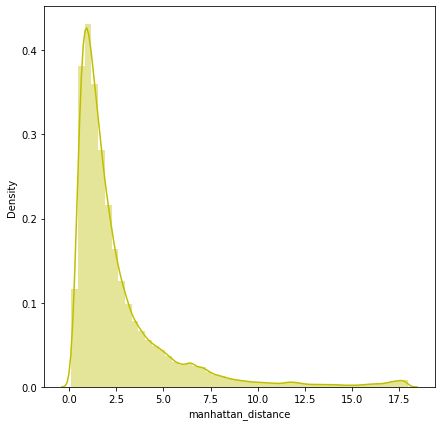

In [ ]:
#Checking for Skweness 
plt.figure(figsize=(7,7))
sns.distplot(df['manhattan_distance'],color="y")

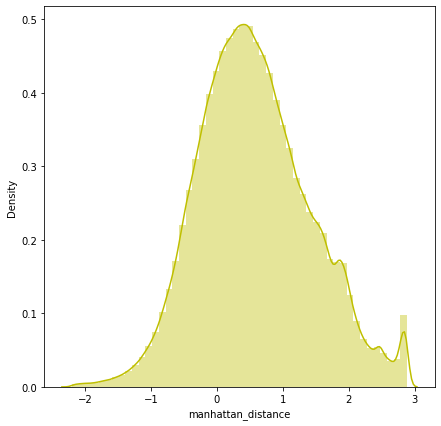

In [ ]:
#Log Transforamtion 
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['manhattan_distance']),color="y")

Here we will impliment log transform. 

### Vendor id

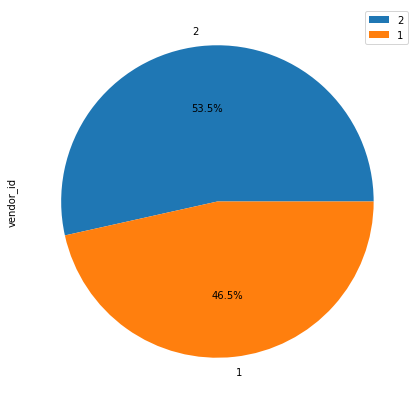

In [ ]:
# Pie chart for vendor ID distribution 
df['vendor_id'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()

We can observe that there are approximately similar percentage on both side 

### **Passenger Count**
The number of passengers in the vehicle (driver entered value)


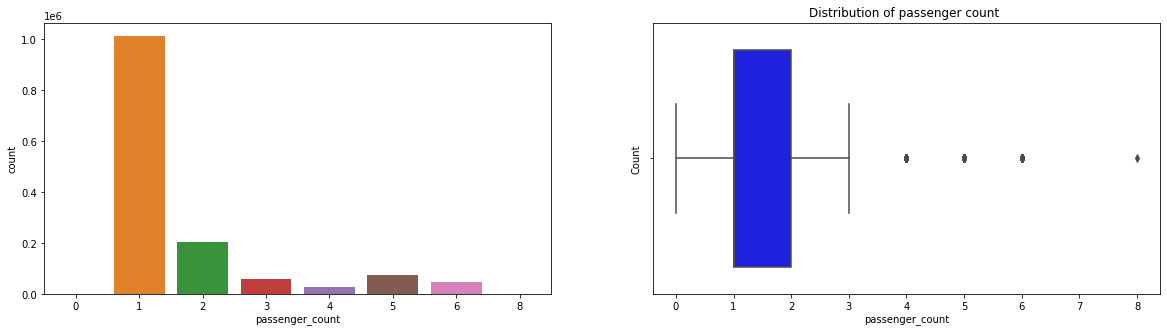

In [ ]:
#Plotting Sub Plot 
fig, axes = plt.subplots(1, 2,figsize=(20,5))

#Plotting bar graph 
sns.countplot(df['passenger_count'],ax=axes[0])
plt.title('Distribution of passenger count ')
plt.xlabel('Passenger')
plt.ylabel('Count')

#Plotting Box Plot
sns.boxplot(df['passenger_count'],color='blue',ax=axes[1])

According to [ Driver Rule 54-15(g)](https://www1.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf) of 'NYC Taxi and Limousine Commission' ,  maximum permissible number of passengers in a taxi is 6. Hence we will drop values which are greater than 6. 

There are some values that are represented by 0, we will drop these values to. because this is clearly a mistake and no further data is available for drawing any conclusions. 

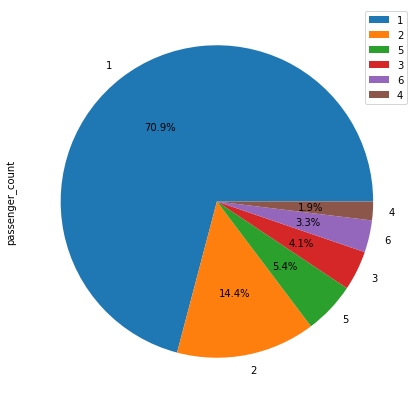

In [ ]:
#Dropping Passenger Count 
df= df[(df['passenger_count']>0) & (df['passenger_count']<=6)]

#Plotting pie chart 
df['passenger_count'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()

### Trip Duration


Text(0.5, 1.0, 'Duration Distribution')

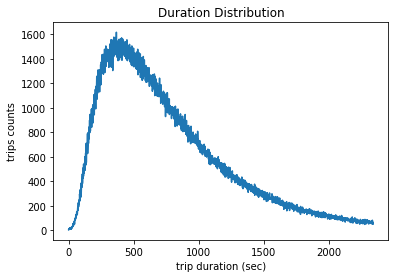

In [ ]:
'''trip duration overall distribution '''

# taking the 97% Quantile values to remove outliers 
tripduration = df[df.trip_duration < df.trip_duration.quantile(.97)]

#Plotting Trip duration VS Trip_duration.counts
tripduration.groupby('trip_duration').count()['id'].plot()
plt.xlabel('trip duration (sec)')
plt.ylabel('trips counts')
plt.title('Duration Distribution')

In [ ]:
df['trip_duration'].sort_values().tail()

73816       86390
355003    1939736
680594    2049578
924150    2227612
978383    3526282
Name: trip_duration, dtype: int64


*   Most trips finished within 6-17 minute (400-1000 sec)
*  Some trips take too long/too fast are obvious wrong, maybe because of tech/maunal operation issues, should filter them in following process





In [ ]:
# Trip duration should less then 3 hours and greater than 30 seconds normally     
df = df[(df['trip_duration']  < 3*3600) & (df['trip_duration'] > 30)]

# Remove potential  trip duration outlier
df = df[(df['trip_duration'] < df['trip_duration'].quantile(0.99)) & (df['trip_duration'] > df['trip_duration'].quantile(0.01))]

### Speed

In [ ]:
'''Calculate Speed '''

# Distance obtained is in Miles/hr
df['Avg_speed'] = 3600 * df['manhattan_distance'] / df['trip_duration']

The speed limit set in [USA](https://en.wikipedia.org/wiki/Speed_limits_in_the_United_States) for fastest moterable road is set at 85 miles per hour, and avg walking speed is considered to be 3mph. so limiting our data to this and adding a 50 % margin for overspeeding and traffic jams.

In [ ]:
# Setting speed in a logical range 
df = df[(df['Avg_speed']  < 130) & (df['Avg_speed'] > 1.0)]

# Removing outliers
df = df[(df['Avg_speed'] < df['Avg_speed'].quantile(0.999)) & (df['Avg_speed'] > df['Avg_speed'].quantile(0.001))]

### **store_and_fwd_flag**
 This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

Text(0, 0.5, 'Count')

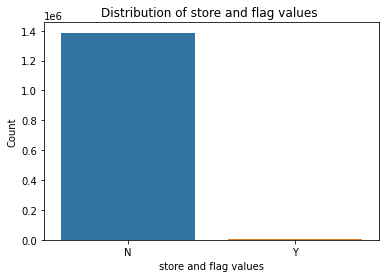

In [ ]:
#Plotting bar graph 
sns.countplot(df['store_and_fwd_flag'])
plt.title('Distribution of store and flag values ')
plt.xlabel('store and flag values')
plt.ylabel('Count')


# Multivariate analysis

We have added new colums, we can use these colums to analyse our data further and perform bivariate analysis 

### Pickup date & Dropoff date

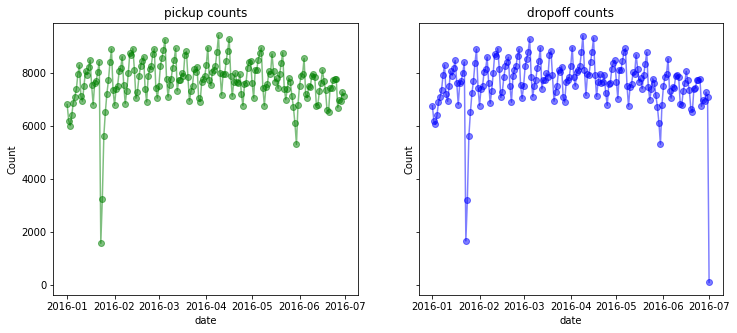

In [ ]:
'''Plotting graph of Pickup and Dropoff counts wrt to dates.'''
fig, ax = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)

#Plotting for Pickups
ax[0].plot(df.groupby('pickup_date').count()['id'], 'go-', alpha=0.5)
ax[0].set(xlabel='date', ylabel='Count',title="pickup counts")

#PLotting For Dropoffs
ax[1].plot(df.groupby('dropoff_date').count()['id'], 'bo-', alpha=0.5)
ax[1].set(xlabel='date', ylabel='Count',title="dropoff counts")

plt.show()

In [ ]:
#Finding Dates with least number of pickups 
df.groupby('pickup_date').count()['id'].sort_values()

pickup_date
2016-01-23    1579
2016-01-24    3251
2016-05-30    5300
2016-01-25    5631
2016-01-03    6013
              ... 
2016-05-07    8936
2016-04-02    8954
2016-03-05    9252
2016-04-16    9282
2016-04-09    9412
Name: id, Length: 182, dtype: int64

In [ ]:
#Finding Dates with least number of dropoffs
df.groupby('dropoff_date').count()['id'].sort_values()

dropoff_date
2016-07-01     102
2016-01-23    1667
2016-01-24    3215
2016-05-30    5309
2016-01-25    5621
              ... 
2016-03-12    8938
2016-04-02    8953
2016-03-05    9274
2016-04-16    9316
2016-04-09    9405
Name: id, Length: 183, dtype: int64

We observe that daily Drop Off vary between 6000 and 1000, values on 26-07-01,2016-01-23,2016-01-24 are considerably low, hence we will drop these observations.

In [ ]:
'''Dropping values from Date with abnormal values, Remove the 2016-01-23 data since its too less comapre others days,
 maybe quality is not good''' 

#Dropping off values 
df= df[(df.pickup_date != '2016-01-23') ]
df= df[(df.dropoff_date != '2016-01-24') ]
df= df[(df.dropoff_date != '26-07-01') ]

### Passenger Count 

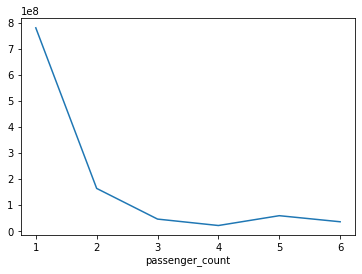

In [ ]:
#Graph B/w Passenger count and count 
df.groupby(['passenger_count']).sum()['trip_duration'].plot()

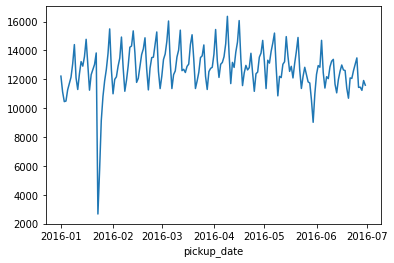

In [ ]:
#Variation of passenger count with pickupdate 
df.groupby(['pickup_date']).sum()['passenger_count'].plot()

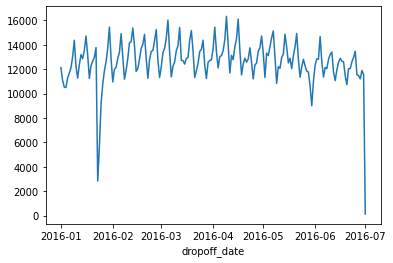

In [ ]:
#Variation of passenger count with dropoff date 
df.groupby(['dropoff_date']).sum()['passenger_count'].plot()

In [ ]:
# Finding the dates with abnoraml values 
df.groupby(['dropoff_date']).sum()['passenger_count'].sort_values()

dropoff_date
2016-07-01      135
2016-01-23     2833
2016-01-24     5652
2016-05-30     9015
2016-01-25     9139
              ...  
2016-04-02    15447
2016-01-30    15462
2016-03-05    16034
2016-04-16    16116
2016-04-09    16340
Name: passenger_count, Length: 183, dtype: int64

In [ ]:
# Finding the dates with abnoraml values 
df.groupby(['pickup_date']).sum()['passenger_count'].sort_values()

pickup_date
2016-01-23     2671
2016-01-24     5705
2016-05-30     9025
2016-01-25     9147
2016-01-03    10458
              ...  
2016-04-02    15453
2016-01-30    15495
2016-03-05    16042
2016-04-16    16071
2016-04-09    16366
Name: passenger_count, Length: 182, dtype: int64



*   Passenger count is considerably less on '2016-07-01' , '2016-01-23'  




### Trip Duration VS Hour

A [pivot table](https://pbpython.com/pandas-pivot-table-explained.html) is a table of grouped values that aggregates the individual items of a more extensive table

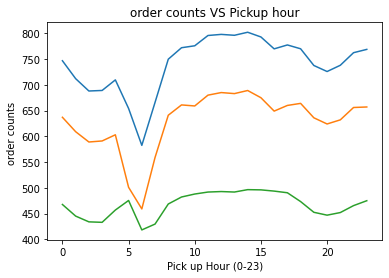

In [ ]:
''' Plotting a pivot table with pickup date time hour and aggrgate (mean median and std) of trip duration '''
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.mean)['trip_duration'].plot(label='mean')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.median)['trip_duration'].plot(label='median')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.std)['trip_duration'].plot(label='std')

# plotting the table 
#plt.legend(loc=0)
plt.xlabel('Pick up Hour (0-23)')
plt.ylabel('order counts ')
plt.title('order counts VS Pickup hour')
plt.show()

##Distance and Trip Duration

### store_and_fwd_flag VS  Trip duration 

Text(0, 0.5, 'Trip Duration')

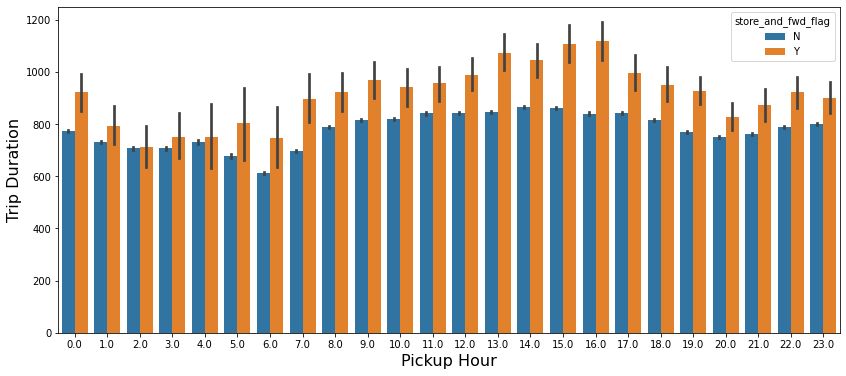

In [ ]:
# Plottong  store_and_fwd_flag VS trip_duration
plt.figure(figsize=(14,6))
sns.barplot(x='pickup_datetime_hour',y='trip_duration',data=df,hue='store_and_fwd_flag')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration',fontsize=16)

### Trip Duration Vs. Pickup/Dropoff Hour for diffrent months. 

Text(0, 0.5, 'Trip Duration)')

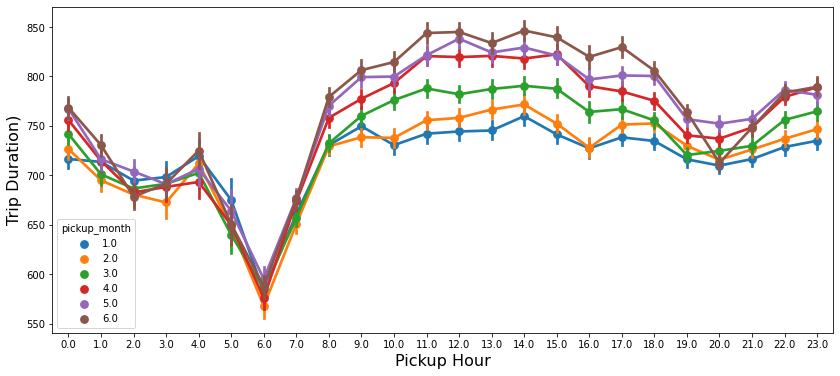

In [ ]:
#Plot showing variation in trip duraion for diffrent pickups for diffrent months 
plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Text(0, 0.5, 'Trip Duration)')

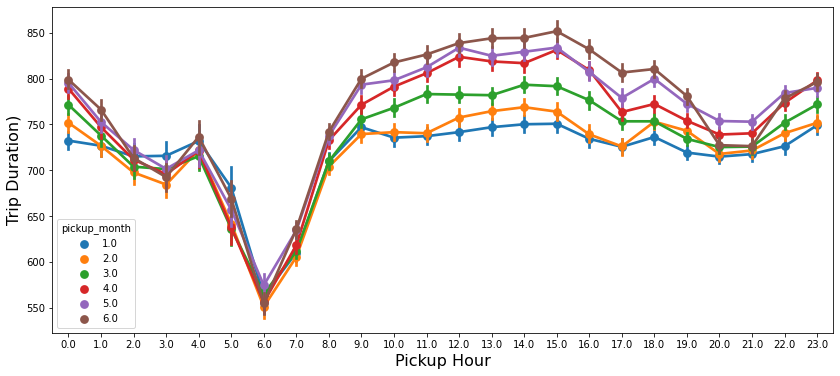

In [ ]:
#Plot showing variation in trip duraion for diffrent dropoffs for diffrent months 
plt.figure(figsize=(14,6))
sns.pointplot(x='dropoff_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Months only affect duration a little bit ; while pickup hours seems may be infulence that more

### Trip Duration vs Pickup/Dropoff hour for diffrent days of the week 




Text(0, 0.5, 'Trip Duration)')

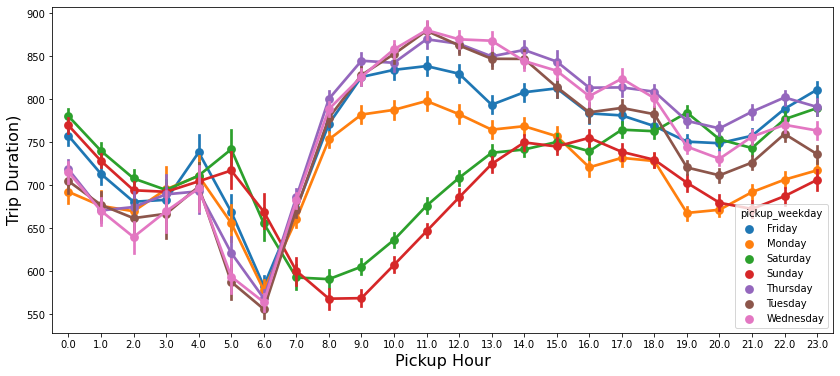

In [ ]:
# Plotting a line graph to represent the change in time duration of trip for diffrent days of the week 
plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_weekday')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)



*   During the moring rush hours from Monday to Friday ie. 7 AM to 10 AM, maybe owing to traffic jam.


* Duration are high duing wokday (Mon.-Fri.)






# Feature Engineering:

In [ ]:
#Dividing 24 hours into four parts
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
#Now let us apply this function and create new columns in the dataset.
df['pickup_timeofday'] = df['pickup_datetime_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_datetime_hour'].apply(time_of_day)

# Check for multicollinearity

Correlation :

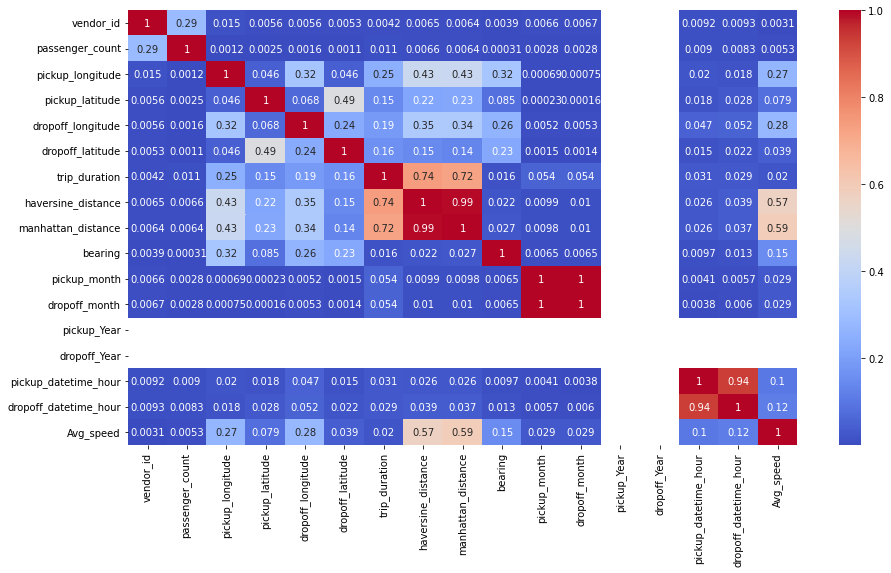

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Calculating VIF to check for multicollinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Distance','haversine_distance','id','vendor_id','dropoff_month','trip_duration','pickup_datetime','dropoff_datetime','pickup_date','dropoff_date','Pick_Up_time','Drop_off_time'	]]])

,variables,VIF
0,passenger_count,1.00026
1,pickup_longitude,1.66193
2,pickup_latitude,1.44416
3,dropoff_longitude,1.45520
4,dropoff_latitude,1.54915
5,manhattan_distance,2.00178
6,bearing,1.52211
7,pickup_month,1.00242
8,pickup_Year,0.00000
9,dropoff_Year,0.00000


In [ ]:
#List of categorical columns for dummy encoding 
categorical_col=['pickup_weekday','pickup_timeofday']
df_train=pd.get_dummies(df, columns = categorical_col,drop_first=False)

In [ ]:
#Dropping off all columns which we will not use to build our predictive columns. 
df_train.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','passenger_count',
               'store_and_fwd_flag','haversine_distance','pickup_date','dropoff_date','dropoff_weekday','pickup_month','dropoff_month','Pick_Up_time','Drop_off_time',
               'pickup_Year','dropoff_Year','dropoff_datetime_hour','Avg_speed','pickup_datetime_hour','dropoff_timeofday'],axis=1,inplace=True)


In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394180 entries, 0 to 1394179
Data columns (total 18 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   pickup_longitude             1394180 non-null  float64
 1   pickup_latitude              1394180 non-null  float64
 2   dropoff_longitude            1394180 non-null  float64
 3   dropoff_latitude             1394180 non-null  float64
 4   trip_duration                1394180 non-null  int64  
 5   manhattan_distance           1394180 non-null  float64
 6   bearing                      1394180 non-null  float64
 7   pickup_weekday_Friday        1394180 non-null  int64  
 8   pickup_weekday_Monday        1394180 non-null  int64  
 9   pickup_weekday_Saturday      1394180 non-null  int64  
 10  pickup_weekday_Sunday        1394180 non-null  int64  
 11  pickup_weekday_Thursday      1394180 non-null  int64  
 12  pickup_weekday_Tuesday       1394180 non-n

In [ ]:
'''
# Writing the dataframe to a csv to ensure no data loss in working
df_train.to_csv('/content/drive/MyDrive/Almabetter Projects /NYC Taxi Trip Time Prediction /NYC Data/df_train.csv')
'''
print('df_tain was saved')

df_tain was saved


In [ ]:
# Reading the dataframe from the csv file again to import the scraped data from the already prepared csv file
df_train = pd.read_csv('/content/drive/MyDrive/Almabetter Projects /NYC Taxi Trip Time Prediction /NYC Data/df_train.csv')
df_train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
independent_variables=df_train[['pickup_longitude', 'pickup_latitude','bearing', 'dropoff_longitude',
       'dropoff_latitude',  'manhattan_distance',
       'pickup_weekday_Friday', 'pickup_weekday_Monday',
       'pickup_weekday_Saturday', 'pickup_weekday_Sunday',
       'pickup_weekday_Thursday', 'pickup_weekday_Tuesday',
       'pickup_weekday_Wednesday', 'pickup_timeofday_Afternoon',
       'pickup_timeofday_Evening', 'pickup_timeofday_Late night',
       'pickup_timeofday_Morning']]

dependent_variables =df_train['trip_duration']

In [ ]:
X = df_train.drop('trip_duration',axis=1)
X['manhattan_distance'] = np.log(X['manhattan_distance'])
Y = np.log10(df_train['trip_duration'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394180 entries, 0 to 1394179
Data columns (total 17 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   pickup_longitude             1394180 non-null  float64
 1   pickup_latitude              1394180 non-null  float64
 2   dropoff_longitude            1394180 non-null  float64
 3   dropoff_latitude             1394180 non-null  float64
 4   manhattan_distance           1394180 non-null  float64
 5   bearing                      1394180 non-null  float64
 6   pickup_weekday_Friday        1394180 non-null  int64  
 7   pickup_weekday_Monday        1394180 non-null  int64  
 8   pickup_weekday_Saturday      1394180 non-null  int64  
 9   pickup_weekday_Sunday        1394180 non-null  int64  
 10  pickup_weekday_Thursday      1394180 non-null  int64  
 11  pickup_weekday_Tuesday       1394180 non-null  int64  
 12  pickup_weekday_Wednesday     1394180 non-n

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model building**
We will start by building simple prediction models and work our way upto more complex models. but first lets start by defining some important function's. 

Defining function to fit model 

In [ ]:
def fit_mod(model, X_train, X_test, Y_train, Y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  global Y_pred
  # Fitting the model
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  a,p = Y_test,Y_pred 

  return Y_pred


Defining to get Evaluation matrix

In [ ]:
def plot_model(model, X_train, X_test, y_train, y_test):

# Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,3))
  plt.subplot(1,1,1)
  plt.plot((Y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted trip duration')

  return model

In [ ]:
def important_features(model):
    importance_df= pd.DataFrame({'Features': X.columns, 'Feature_importance': list(model.best_estimator_.feature_importances_)})
    importance_df.sort_values(by=['Feature_importance'],ascending=False)[:5] 
    '''Sorting the values''' 
    '''Sorting the values''' 
    importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)
    importance_df.head()
    '''Plotting the feature importance in a graph''' 
    plt.figure(figsize=(15,6))
    plt.title('Feature Importance', fontsize=20)
    sns.barplot(x="Feature_importance",y='Features', data=importance_df[:6], orient = 'h')
    plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
'''Storing Values in a list'''
#TEST 
test_mse= []
test_r2=[]
test_adjr2=[]
test_rmse=[]
#TRAIN
train_mse=[]
train_r2=[]
train_adjr2=[]
train_rmse=[]

def Get_model(model,X_train,X_test,Y_train,Y_test):
      
    fit_mod(model, X_train, X_test, Y_train, Y_test)
    ''' Storing predictions for Evaluation '''
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    '''Computing MSE ,R2 and Adjusted R2 score for train data''' 
    # Mean Square Error 
    train_mse_  = mean_squared_error(Y_train, Y_pred_train)
    print("Train MSE :" , train_mse_)

    #Root mean square error 
    train_rmse_ = np.sqrt(train_mse_)
    print("Train RMSE :" ,train_rmse_)

    #R2
    train_r2_ = r2_score(Y_train, Y_pred_train)
    print("Train R2 :" ,train_r2_)

    # Adjusted R2
    train_ar2_= 1-(1-r2_score((Y_train), (Y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
    print("Train Adjusted R2 : ",train_ar2_)

    '''Computing MSE ,R2 and Adjusted R2 score for test data''' 
    # Mean Square Error 
    test_mse_  = mean_squared_error(Y_test, Y_pred_test)
    print("Test MSE :" , test_mse_)

    #Root mean square error 
    test_rmse_ = np.sqrt(test_mse_)
    print("Test RMSE :" ,test_rmse_)

    #R2
    test_r2_ = r2_score(Y_test, Y_pred_test)
    print("Test R2 :" ,test_r2_)

    # Adjusted R2
    test_ar2_= 1-(1-r2_score((Y_test), (Y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Test Adjusted R2 : ", test_ar2_)

    '''Storing Values in a list '''
    model=model
    #TEST 
    test_mse.append(test_mse_)
    test_r2.append(test_r2_)
    test_adjr2.append(test_ar2_)
    test_rmse.append(test_rmse_)
    #TRAIN
    train_mse.append(train_mse_)
    train_r2.append(train_r2_)
    train_adjr2.append(train_ar2_)
    train_rmse.append(train_rmse_)

    try:
      plot_model(model, X_train, X_test, Y_train, Y_test)
    except Exception:
      pass

    try:
      important_features(model)
    except Exception:
      pass      

    return 

Plotting actual vs pridicted values graph and Feature importance 

## Linear regression 

Train MSE : 0.030150653815097718
Train RMSE : 0.173639436232377
Train R2 : 0.6472942601700461
Train Adjusted R2 :  0.6472881161507562
Test MSE : 0.030173011213982647
Test RMSE : 0.17370380310742378
Test R2 : 0.6463777384380183
Test Adjusted R2 :  0.646363364786667


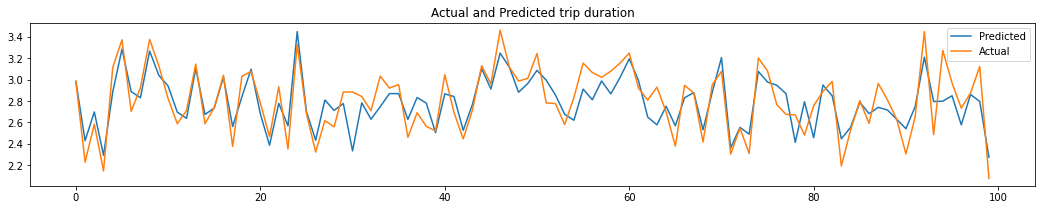

In [ ]:
# Defining LinearRegression and fitting the function 
lr = LinearRegression()
Get_model(lr, X_train, X_test, Y_train, Y_test)

## Lasso Regression

In [ ]:
# Defining Lasso Regression and fitting the function 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5,verbose=False)

Train MSE : 0.03015057727342222
Train RMSE : 0.1736392158281712
Train R2 : 0.6472951555631759
Train Adjusted R2 :  0.6472890115594834
Test MSE : 0.030172912195418254
Test RMSE : 0.17370351808589904
Test R2 : 0.6463788989177739
Test Adjusted R2 :  0.6463645253135926


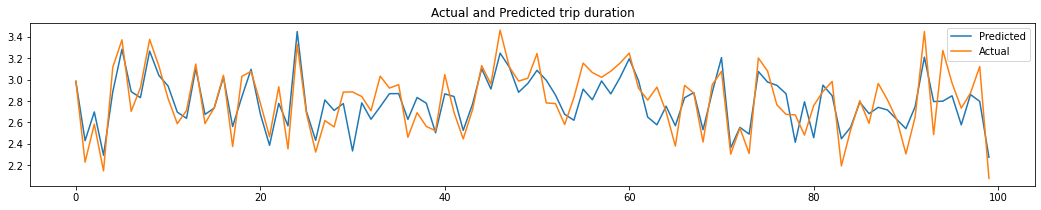

In [ ]:
Get_model(lasso_regressor, X_train, X_test, Y_train, Y_test)

In [ ]:
print('The best fit alpha value is found out to be :' ,lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}
The R2 score using the same alpha is : 0.6472812701044465


##Ridge Regression

In [ ]:
# Defining Ridge Regression and fitting the function 
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

Train MSE : 0.030150577287980377
Train RMSE : 0.1736392158700919
Train R2 : 0.647295155392873
Train Adjusted R2 :  0.6472890113891776
Test MSE : 0.030172912804526195
Test RMSE : 0.17370351983919669
Test R2 : 0.6463788917791384
Test Adjusted R2 :  0.6463645181746669


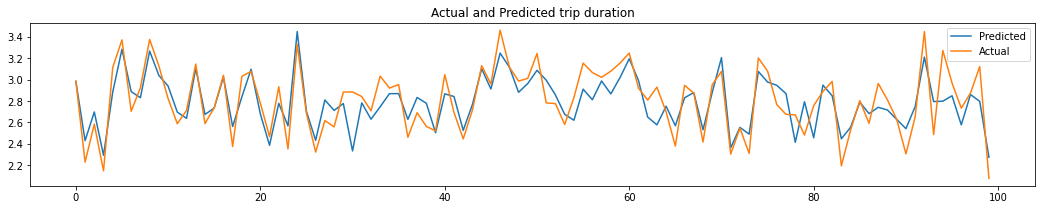

In [ ]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
rr = GridSearchCV(ridge, parameters, scoring='r2', cv=5)

Get_model(rr, X_train, X_test, Y_train, Y_test)

In [ ]:
print('The best fit alpha value is found out to be :' ,rr.best_params_)
print('The R2 score using the same alpha is :', rr.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}
The R2 score using the same alpha is : 0.6472812711240307


## Decision Tree

In [ ]:
# Minimum number of samples required to split a node:
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [8,16,22]

# Maximum depth of trees:
max_depth = [6,8,10,15]

If you have access to Powerful machine, please use the commented code below for hyper paramaeter tuning, If time is of the essence continue.

In [ ]:
'''
# Regressor

regressor = DecisionTreeRegressor(random_state=1)


# Hyperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dtr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)

#Fitting the model 
dtr_train_mse,dtr_train_r2,dtr_train_ar2_,dtr_test_mse,dtr_test_r2,dtr_test_ar2_= Get_model(dtr, X_train, X_test, Y_train, Y_test)
'''
print("Proceed to RandomizedSearchCV")


Proceed to RandomizedSearchCV


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train MSE : 0.02041658501878421
Train RMSE : 0.14288661595399413
Train R2 : 0.7611644918875502
Train Adjusted R2 :  0.7611603314506669
Test MSE : 0.02318605120617704
Test RMSE : 0.1522696660736374
Test R2 : 0.7282636523722019
Test Adjusted R2 :  0.7282526071300188


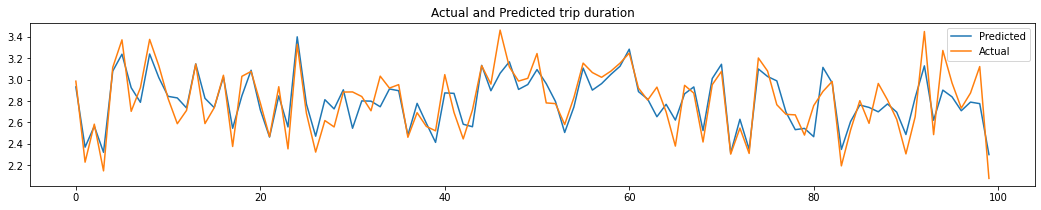

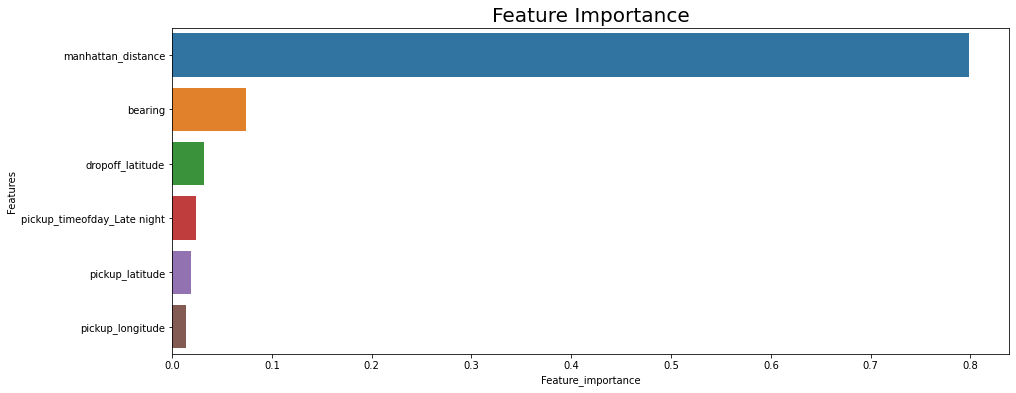

In [ ]:
#Defining Model 
regressor = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dtr = RandomizedSearchCV(regressor, param_distributions = grid, scoring = 'neg_mean_squared_error', cv=5,random_state=6,verbose=True,n_jobs=-1)

#Fitting the model 
Get_model(dtr, X_train, X_test, Y_train, Y_test)

In [ ]:
print('The best fit alpha value is found out to be :' ,dtr.best_params_)
print('The R2 score using the same alpha is :', dtr.best_score_)

The best fit alpha value is found out to be : {'min_samples_split': 10, 'min_samples_leaf': 16, 'max_depth': 15}
The R2 score using the same alpha is : -0.023436680077047953


## Random Forest 

In [ ]:
# Number of trees in random forest
n_estimators = [50,100,150]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10,15]

# Minimum number of samples required to split a node
min_samples_split = [5, 10,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10,15]
  

If you have access to Powerful machine, please use the commented code below for hyper paramaeter tuning, If time is of the essence continue. 


In [ ]:
# Regressor
'''
regressor = RandomForestRegressor(random_state=2)


# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
rf = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)

#Fitting the model 
forest_train_mse,forest_train_r2,forest_train_ar2_,forest_test_mse,forest_test_r2,forest_test_ar2_= Get_model(rf, X_train, X_test, Y_train, Y_test)
'''
print("Proceed to RandomizedSearchCV")


Proceed to RandomizedSearchCV


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 17.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.0s finished


Train MSE : 0.01829761547265252
Train RMSE : 0.1352686788308828
Train R2 : 0.7859524359908147
Train Adjusted R2 :  0.7859487073518567
Test MSE : 0.02091453399694979
Test RMSE : 0.14461858109160727
Test R2 : 0.7548854252873182
Test Adjusted R2 :  0.7548754621378759


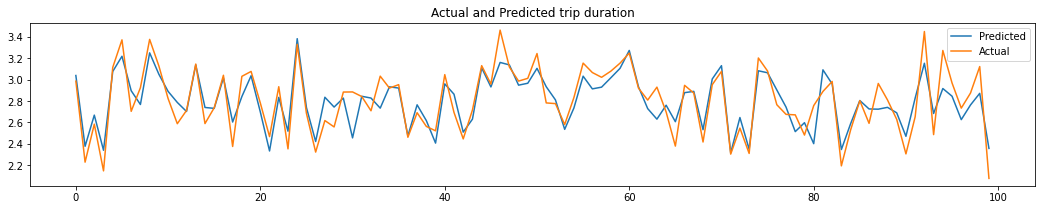

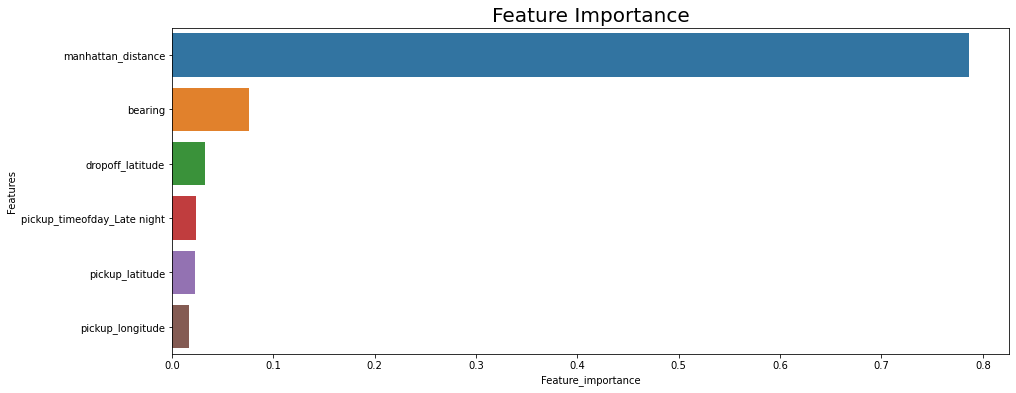

In [ ]:
#Fitting model 
regressor = RandomForestRegressor(random_state=2,oob_score=False,verbose=True)


# Hyperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
rf = RandomizedSearchCV(regressor, param_distributions = grid, scoring = 'neg_mean_squared_error', cv=2,random_state=6,verbose=True,n_jobs=-1)

Get_model(rf, X_train, X_test, Y_train, Y_test)


In [ ]:
print('The best fit alpha value is found out to be :' ,rf.best_params_)
print('The R2 score using the same alpha is :', rf.best_score_)

The best fit alpha value is found out to be : {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 15}
The R2 score using the same alpha is : -0.02114276192946355


## XG boost

In [ ]:
from xgboost import XGBRegressor as xgb
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV

In [ ]:
# Learning rate:
eta = [0.05,0.08,0.1]

# HYperparameter Grid
grid = {'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [5, 8, 10],
        'min_samples_' : [2,4,6],
        'n_estimators' : [100,200,300]}

If you have access to Powerful machine, please use the commented code below for hyper paramaeter tuning, If time is of the essence continue.

In [ ]:
# Regressor
'''
regressor = XGBRegressor(silent=True,random_state=0, objective='reg:squarederror')



# GridSearch to find the best parameters
xgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)

#Fitting the model 
xgb_train_mse,xgb_train_r2,xgb_train_ar2_,xgb_test_mse,xgb_test_r2,xgb_test_ar2_= Get_model(xgb, X_train, X_test, Y_train, Y_test)
'''
print("Proceed to RandomizedSearchCV")

Proceed to RandomizedSearchCV


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Train MSE : 0.017510958038649303
Train RMSE : 0.1323289765646561
Train R2 : 0.795154843141067
Train Adjusted R2 :  0.795151274805049
Test MSE : 0.018720233777435147
Test RMSE : 0.13682190532745533
Test R2 : 0.7806022289787949
Test Adjusted R2 :  0.7805933111378933


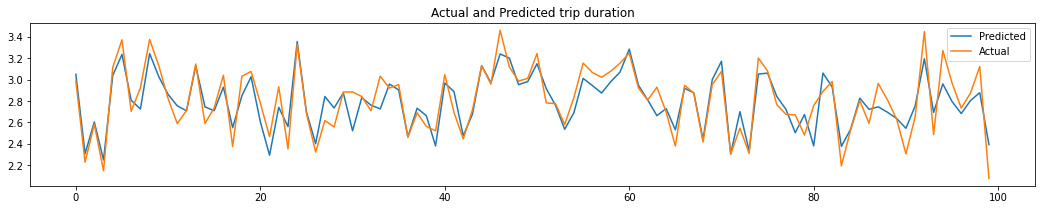

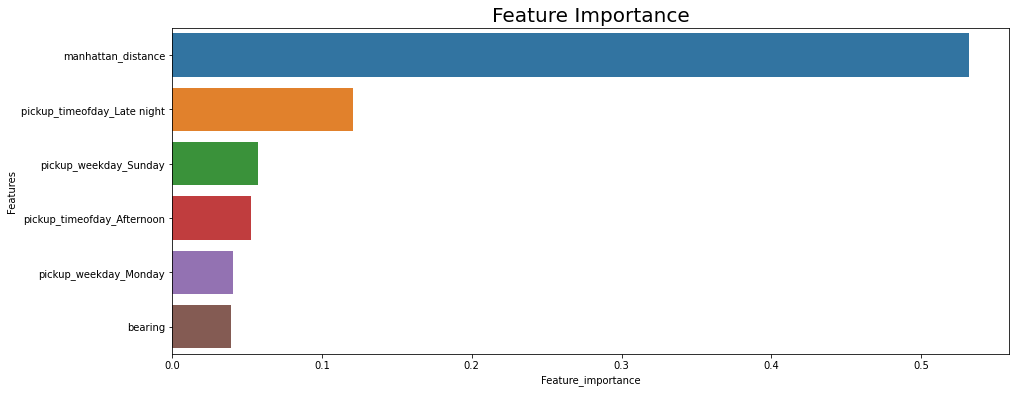

In [ ]:
#Regressor
regressor = XGBRegressor(silent=True,random_state=0, objective='reg:squarederror')

# GridSearch to find the best parameters
xgb = RandomizedSearchCV(regressor, param_distributions = grid, scoring = 'neg_mean_squared_error', cv=2,random_state=6,verbose=True,n_jobs=-1)

#Fitting the model 
Get_model(xgb, X_train, X_test, Y_train, Y_test)

In [ ]:
print('The best fit alpha value is found out to be :' ,xgb.best_params_)
print('The R2 score using the same alpha is :', xgb.best_score_)

The best fit alpha value is found out to be : {'n_estimators': 300, 'min_samples_': 6, 'max_depth': 8, 'learning_rate': 0.1}
The R2 score using the same alpha is : -0.019016840290862064


## GradientBoost 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [150]

# Maximum depth of trees:
max_depth = [8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

If you have access to Powerful machine, please use the commented code below for hyper paramaeter tuning, If time is of the essence continue.

In [ ]:
# Regressor
'''
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)

#Fitting the model 
gbr_train_mse,gbr_train_r2,gbr_train_ar2_,gbr_test_mse,gbr_test_r2,gbr_test_ar2_= Get_model(gbr, X_train, X_test, Y_train, Y_test)
'''
print('Proceed to RandomizedSearchCV')

Proceed to RandomizedSearchCV


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Train MSE : 0.017018245185545882
Train RMSE : 0.13045399643378458
Train R2 : 0.8009186535195519
Train Adjusted R2 :  0.8009151855872364
Test MSE : 0.018630980159971805
Test RMSE : 0.13649534849207062
Test R2 : 0.781648265313589
Test Adjusted R2 :  0.7816393899908294


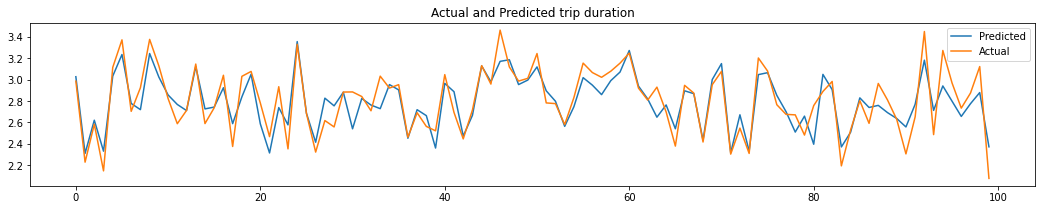

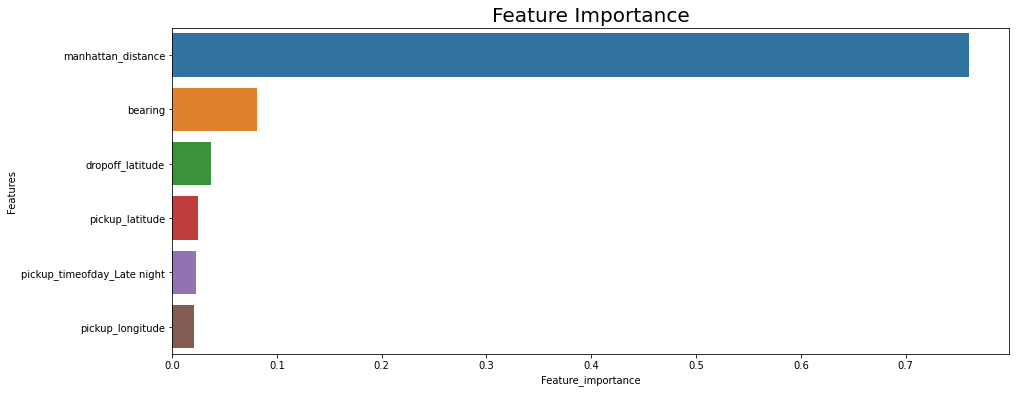

In [ ]:
regressor = GradientBoostingRegressor(random_state=4)

# Hyperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=2,verbose=True,n_jobs=-1)

Get_model(gbr, X_train, X_test, Y_train, Y_test)

# Model Evalutaion 


In [ ]:
import warnings; warnings.simplefilter('ignore')

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','Ramdom Forest','XGBoost Regressor','GradientBoost']
with pd.option_context('display.precision', 10):
 model_comparison = pd.DataFrame({'Model Name': models,
                          'Train_MSE': train_mse,'Test_MSE': test_mse,
                          'Train_R^2': train_r2, 'Test_R^2': test_r2,
                          'Train_Adjusted_R^2': train_adjr2, 'Test_Adjusted_R^2': test_adjr2,
                          'Test Rsme': test_rmse,'Train Rsme': train_rmse})
model_comparison

,Model Name,Train_MSE,Test_MSE,Train_R^2,Test_R^2,Train_Adjusted_R^2,Test_Adjusted_R^2,Test Rsme,Train Rsme
0,Linear Regression,0.03015,0.03017,0.64729,0.64638,0.64729,0.64636,0.17370,0.17364
1,Lasso Regression,0.03015,0.03017,0.64730,0.64638,0.64729,0.64636,0.17370,0.17364
2,Ridge Regression,0.03015,0.03017,0.64730,0.64638,0.64729,0.64636,0.17370,0.17364
3,DecisionTree Regressor,0.02042,0.02319,0.76116,0.72826,0.76116,0.72825,0.15227,0.14289
4,Ramdom Forest,0.01830,0.02091,0.78595,0.75489,0.78595,0.75488,0.14462,0.13527
5,XGBoost Regressor,0.01751,0.01872,0.79515,0.78060,0.79515,0.78059,0.13682,0.13233


In [ ]:
# Writing the dataframe to a csv to ensure no data loss in working
model_comparison.to_csv('/content/drive/MyDrive/Almabetter Projects /NYC Taxi Trip Time Prediction /NYC Data/model.csv')

In [ ]:
# Reading the dataframe from the csv file again to import the scraped data from the already prepared csv file
model_comparison = pd.read_csv('/content/drive/MyDrive/Almabetter Projects /NYC Taxi Trip Time Prediction /NYC Data/model.csv')

In [ ]:
model_comparison.drop(['Unnamed: 0'],axis=1,inplace=True)
model_comparison

,Model Name,Train_MSE,Test_MSE,Train_R^2,Test_R^2,Train_Adjusted_R^2,Test_Adjusted_R^2,Test Rsme,Train Rsme
0,Linear Regression,0.030151,0.030173,0.647294,0.646378,0.647288,0.646363,0.173704,0.173639
1,Lasso Regression,0.030151,0.030173,0.647295,0.646379,0.647289,0.646365,0.173704,0.173639
2,Ridge Regression,0.030151,0.030173,0.647295,0.646379,0.647289,0.646365,0.173704,0.173639
3,DecisionTree Regressor,0.020417,0.023186,0.761164,0.728264,0.761160,0.728253,0.152270,0.142887
4,Ramdom Forest,0.018298,0.020915,0.785952,0.754885,0.785949,0.754875,0.144619,0.135269
5,XGBoost Regressor,0.017511,0.018720,0.795155,0.780602,0.795151,0.780593,0.136822,0.132329
6,GradientBoost,0.017018,0.018631,0.800919,0.781648,0.800915,0.781639,0.136495,0.130454


#**Conclusion**
* We can see that MSE and R2 and Adjusted R2 which are the metrics used to evaluate the performance of regression model of **Linear Regression, Lasso, Ridge, Decision Tree, Random Forest and XGBoost Regressor.**
* The Linear models don't show good performance on our training and testing environment.
* There is a significant improvement in the RMSE score for the tuned XGBoost regressor over the Random Forest regressor when trained on the feature selection group.

* The variance score of the XGB Regression  more efficient than other Regression Models.

* XGBoost Regression model  proved to be much more efficient in predicting the output. But it takes much more time to train it over the large dataset with more complexity as compared to the other Regresson models.
* From above table we can conclude that **XGBoost Regressor (78.1%)** is the best models as compare to the other models to predict the trip duration for a particular taxi.


# **NOTE** :(limitation)

As we are dealing with a huge data set, there were limitations while running grid search CV, there is space to further improve on the 